#Step 1: Import Neccessary Library

In [7]:
# Data Handling
import pandas as pd                  # DataFrame creation and data manipulation
import numpy as np                   # Numerical computations

# Visualization
import matplotlib.pyplot as plt      # Basic plotting
import seaborn as sns                # Enhanced plotting (built on Matplotlib)

# Machine Learning Algorithms & Utilities
from sklearn.linear_model import LinearRegression        # Linear Regression Model
from sklearn.model_selection import train_test_split     # Split data into train and test sets

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Plotting in Jupyter/Colab
%matplotlib inline

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 2 : Load The Dataset

In [9]:
DATA_URL = "/content/drive/MyDrive/Colab Notebooks/linear regression/Advertising.csv"

In [10]:
data=pd.read_csv(DATA_URL, index_col=0)

In [11]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


step 3: Summarizing The Dataset

In [12]:
# Show first 5 rows
print("First 5 rows of the dataset:")
print(data.head(10))

First 5 rows of the dataset:
       TV  Radio  Newspaper  Sales
1   230.1   37.8       69.2   22.1
2    44.5   39.3       45.1   10.4
3    17.2   45.9       69.3    9.3
4   151.5   41.3       58.5   18.5
5   180.8   10.8       58.4   12.9
6     8.7   48.9       75.0    7.2
7    57.5   32.8       23.5   11.8
8   120.2   19.6       11.6   13.2
9     8.6    2.1        1.0    4.8
10  199.8    2.6       21.2   10.6


In [13]:
# Display basic information (data types, missing values)
print("\nInformation about the dataset:")
data.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [14]:
# Statistical description of numerical columns
print("\nDescriptive statistics for numerical columns:")
print(data.describe())


Descriptive statistics for numerical columns:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [15]:
# Dataset shape
data.shape

(200, 4)

step 4: Pre processing The Dataset

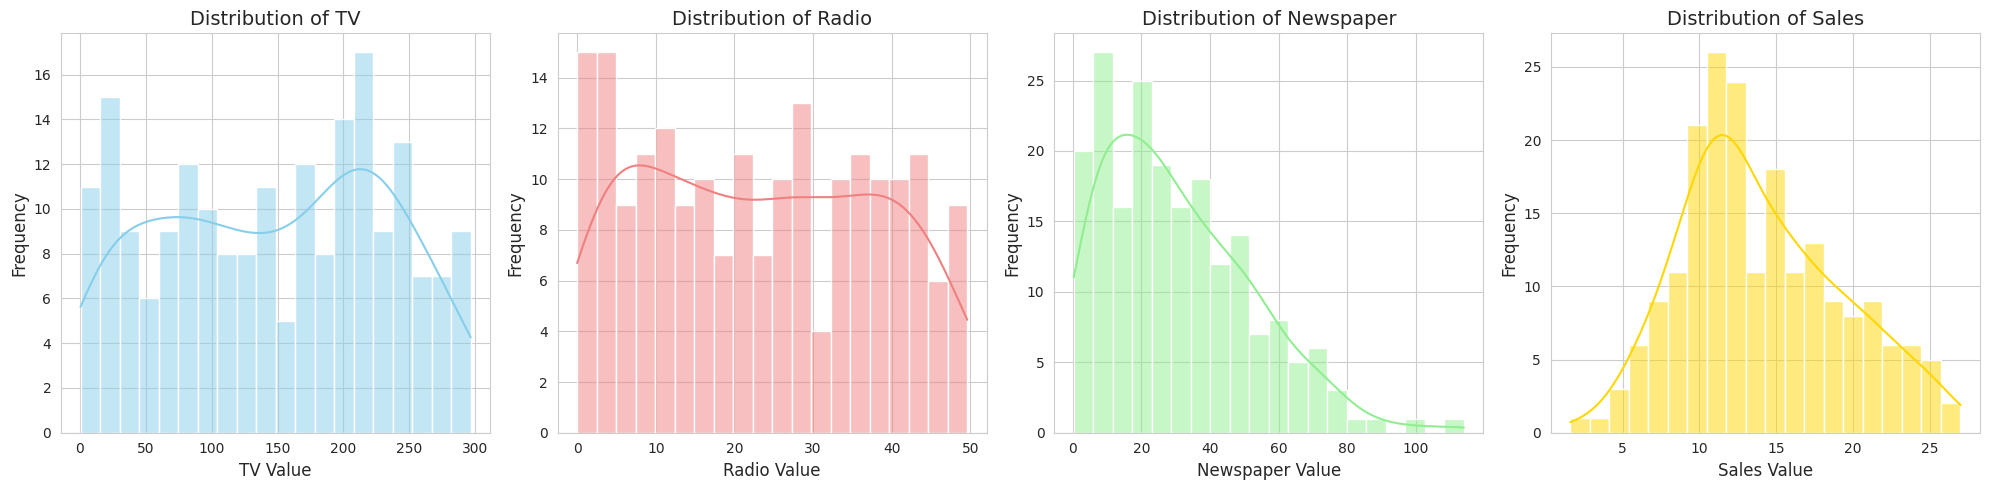

In [16]:
# Set visualization theme
sns.set_style("whitegrid")

# Distribution of each feature and the target
plt.figure(figsize=(20, 5))

features = ['TV', 'Radio', 'Newspaper', 'Sales']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.histplot(data[col], kde=True, bins=20, color=colors[i])
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(f'{col} Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

<Axes: >

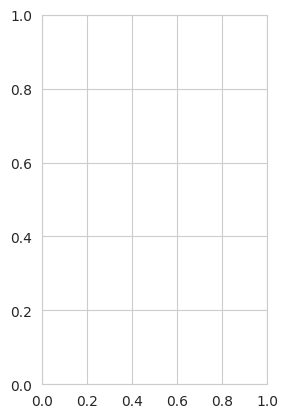

In [17]:
plt.subplot(1, 2, 1)

<Axes: xlabel='TV', ylabel='Count'>

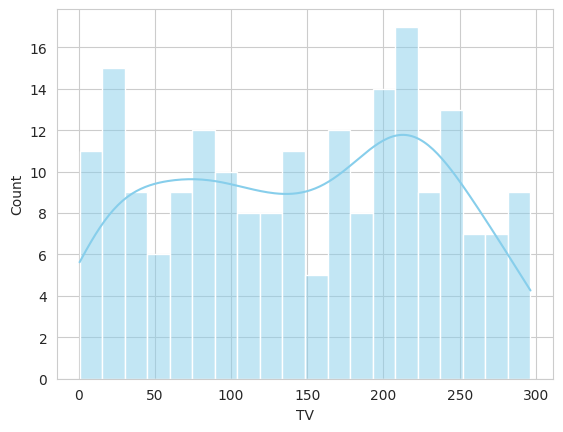

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Needed for subplot, though not directly in this line, it's good context

# --- Modifications to make this cell runnable in isolation ---
# The original error 'NameError: name \'data\' is not defined' means the DataFrame was not loaded.
# The following lines load the data, assuming DATA_URL is set in an earlier cell
# or explicitly defined here.

# Ensure DATA_URL is defined (copy from BWxceTTgCOzy if needed)
DATA_URL = "/content/drive/MyDrive/Colab Notebooks/linear regression/Advertising.csv"

# Load 'data' DataFrame if it's not already in memory
try:
    data = pd.read_csv(DATA_URL, index_col=0)
except FileNotFoundError:
    print(f"Error: Data file not found at {DATA_URL}. Please ensure the file exists and the path is correct.")
    # Exit or handle error as appropriate if data cannot be loaded.
    # For this fix, we assume the data is accessible.
except Exception as e:
    print(f"An error occurred while loading data: {e}")

# Define context variables 'col', 'colors', and 'i' for a single plot.
# These would normally be provided by the loop in cell TqW7xrsPGpmm.
# Example: Plotting the 'TV' column
col = 'TV'
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold'] # Re-define the colors list
i = 0 # 'TV' is the first feature, corresponding to 'skyblue'

# --- End of modifications for isolation ---

sns.histplot(data[col], kde=True, bins=20, color=colors[i])

# What it does:
#  Draws a histogram for one column
# Breakdown:
#  data[col] → the actual column values
#  bins=20 → divides data into 20 bars
#  kde=True → overlays a smooth density curve
#  color=colors[i] → uses matching color
#  📌 Each loop iteration:
#     plots a different column
#     in a different subplot
#     with a different color

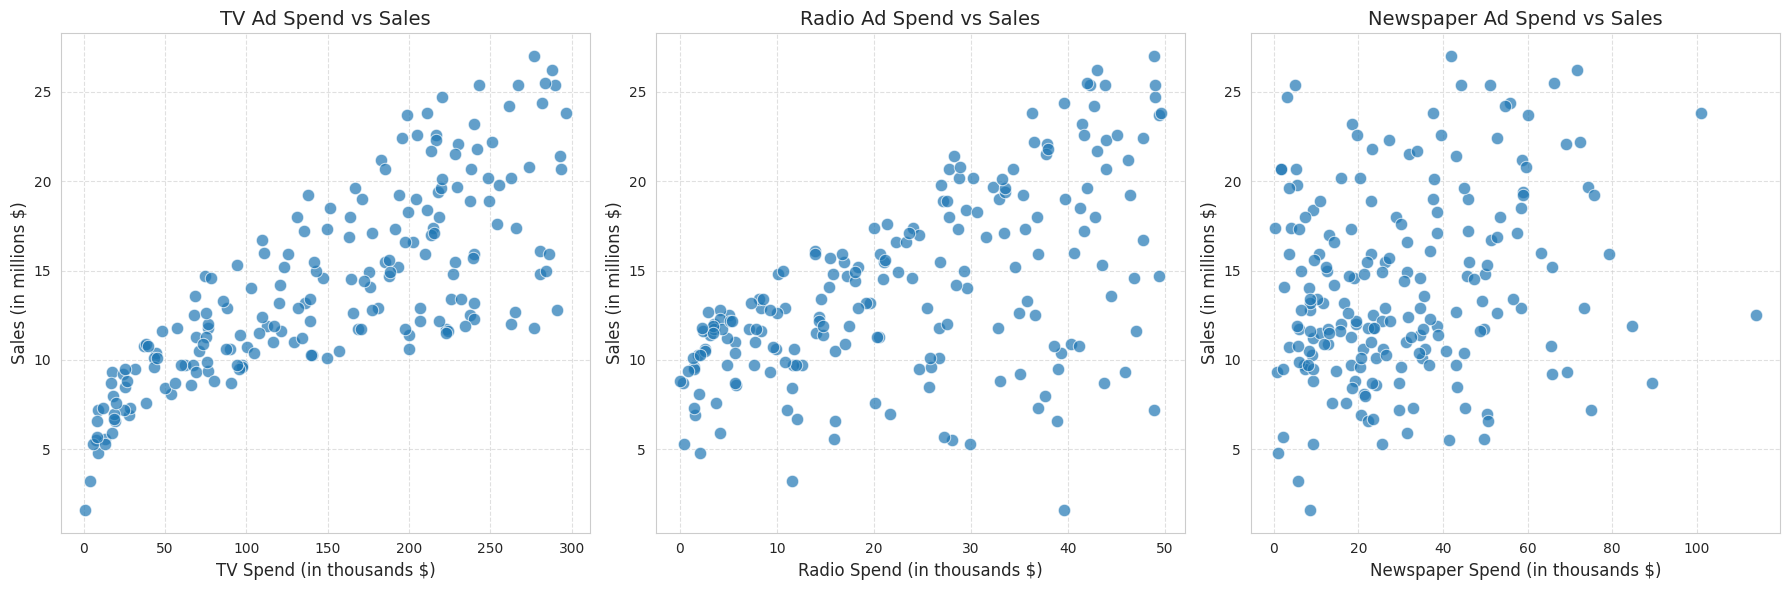

In [19]:
# Scatter plots for Sales vs Ad Spend
plt.figure(figsize=(18, 6))

for i, col in enumerate(['TV', 'Radio', 'Newspaper']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=col, y='Sales', data=data, s=80, alpha=0.7)
    plt.title(f'{col} Ad Spend vs Sales', fontsize=14)
    plt.xlabel(f'{col} Spend (in thousands $)', fontsize=12)
    plt.ylabel('Sales (in millions $)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

step 5: Segregetting the dataset into input and output

In [20]:
# Feature (X) and Target (y)
X = data[['TV']]           # Using only 'TV' as input
y = data['Sales']          # Sales as the target

In [21]:
X

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


In [22]:
y

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [23]:
data['TV']

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


In [24]:
#Data in 1D
data['TV'].shape

(200,)

In [25]:
#Converting input in 1D to 2D
data[['TV']].shape

(200, 1)

In [26]:
data['Sales']

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [27]:
X = data[['TV']]
Y = data['Sales']

In [28]:
Y

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [29]:
X

,TV
1,230.1
2,44.5
3,17.2
4,151.5
5,180.8
...,...
196,38.2
197,94.2
198,177.0
199,283.6


11th Feb session

step6 :-splitting the data into training and testing

In [30]:
# Splitting data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 160 samples
Testing set size: 40 samples


step7:-loading linear regression model

In [31]:
# Initialize Linear Regression model, Y = mX + C
model = LinearRegression()

In [32]:
model

LinearRegression()

step 8:- Training the model

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Output the coefficients
print("\nLinear Regression Model training complete!")
print(f"Model Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")


Linear Regression Model training complete!
Model Coefficient (Slope): 0.05
Model Intercept: 7.12


# y = 0.0465x+7.1196

step 9:- test the model

In [35]:
#model has predicted output
y_pred = model.predict(X_test)

In [36]:
y_pred

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

step10:-calculating the accuracy of trained model

In [37]:
# show error 2.4 = (predicted value, actual value)
mean_absolute_error(y_pred, y_test)

2.444420003751042

In [38]:
#shows accuracy - predicted value, actual value
r2_score(y_pred, y_test)

0.42274365145319936

step 11 :- linear regression formula

In [39]:
# value of m value
model.coef_

array([0.04652973])

In [40]:
#value of C from formula Y = mX + C
model.intercept_

np.float64(7.119638430592953)

step 12 :- Visulisation

<Axes: xlabel='TV', ylabel='Sales'>

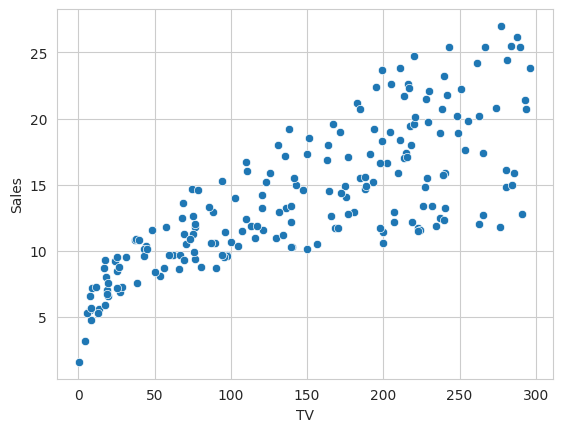

In [41]:
sns.scatterplot(x=data['TV'], y=data['Sales'])

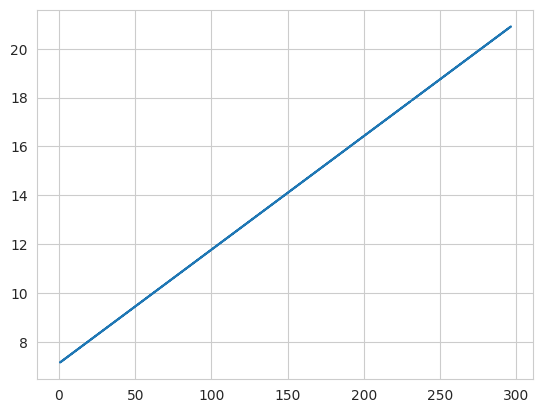

In [42]:
#all the input
plt.plot(X, model.predict(X))

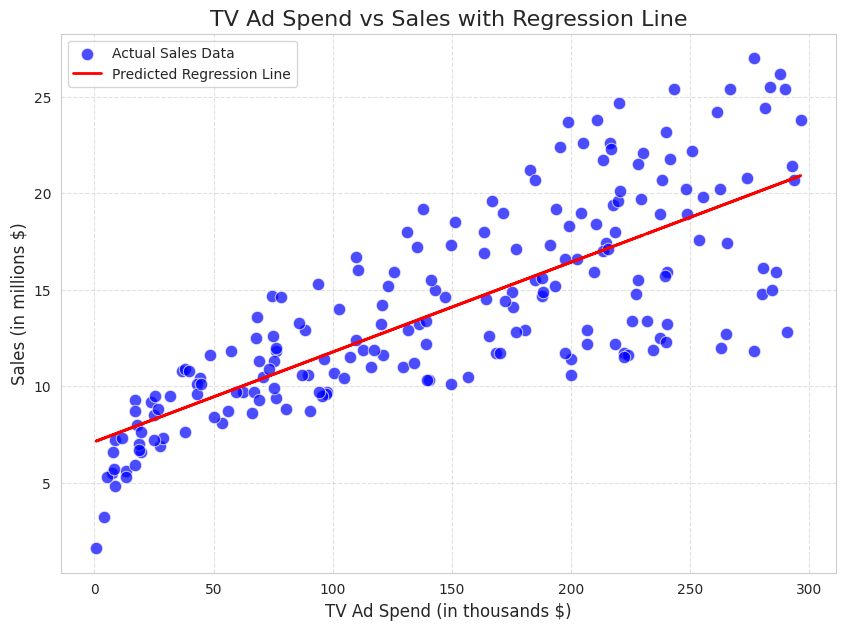

In [43]:
# Visualizing Regression Line
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data['TV'], y=data['Sales'], color='blue', s=80, alpha=0.7, label='Actual Sales Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Predicted Regression Line')
plt.title('TV Ad Spend vs Sales with Regression Line', fontsize=16)
plt.xlabel('TV Ad Spend (in thousands $)', fontsize=12)
plt.ylabel('Sales (in millions $)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()